In [4]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager

In [ ]:
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/wt_1_rmsd.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/wt_2_rmsd.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/wt_3_rmsd.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/om_1_rmsd.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/om_2_rmsd.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/om_3_rmsd.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/wt_1_rmsf.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/wt_2_rmsf.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/wt_3_rmsf.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/om_1_rmsf.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/om_2_rmsf.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/dat/om_3_rmsf.dat
!wget https://raw.githubusercontent.com/yamnor/rbd-ace2-drin/main/matplotlibrc

In [5]:
sys = ['wt_1', 'wt_2', 'wt_3', 'om_1', 'om_2', 'om_3']

In [10]:
rmsf = {}
rmsd = {}
for m in range(len(sys)):
  rmsf[m] = np.array([[float(xx) for xx in x.split()] for x in open(f'dat/{sys[m]}_rmsf.dat').readlines()[1:]]).T
  rmsd[m] = np.array([[float(xx) for xx in x.split()] for x in open(f'dat/{sys[m]}_rmsd.dat').readlines()[1:]]).T

In [7]:
def rcparams(plt, figsize, subplot):
  plt.rcParams["figure.figsize"]        = figsize
  plt.rcParams["figure.subplot.left"]   = subplot['left'] / figsize[0]
  plt.rcParams["figure.subplot.right"]  = 1.00 - subplot['right'] / figsize[0]
  plt.rcParams["figure.subplot.bottom"] = subplot['bottom'] / figsize[1]
  plt.rcParams["figure.subplot.top"]    = 1.00 - subplot['top'] / figsize[1]
  plt.rcParams["figure.subplot.wspace"] = subplot['wspace'] / figsize[0]
  plt.rcParams["figure.subplot.hspace"] = subplot['hspace'] / figsize[1]
  plt.rcParams["axes.grid"]             = subplot['grid']

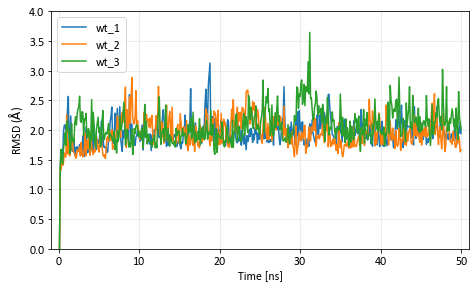

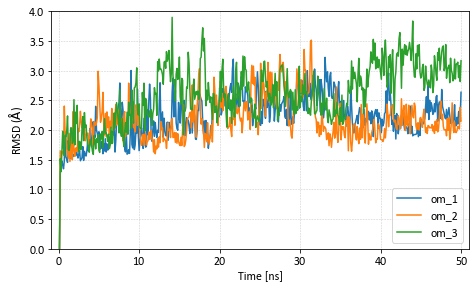

In [11]:
figsize = [6.5, 4.0]
subplot = {
  'left':   0.60,
  'right':  0.10,
  'bottom': 0.45,
  'top':    0.25,
  'wspace': 1.50,
  'hspace': 2.00,
  'grid': True,
}
idx = [[0, 1, 2], [3, 4, 5]]
for m in range(2):
  with plt.style.context('./matplotlibrc'):
    rcparams(plt, figsize, subplot)
    fig, ax = plt.subplots(1,1)
  for n in range(len(idx[m])):
    x,y = rmsd[idx[m][n]]
    ax.plot(x * 0.1, y, label = sys[idx[m][n]])
  ax.set_xlabel('Time [ns]')
  ax.set_ylabel(r'RMSD ($\mathrm{\AA}$)')
  ax.set_ylim(0, 4.0)
  ax.legend()

In [41]:
figsize = [6.0, 6.0]
subplot = {
  'left':   0.60,
  'right':  0.20,
  'bottom': 0.45,
  'top':    0.25,
  'wspace': 1.50,
  'hspace': 2.00,
  'grid': True,
}

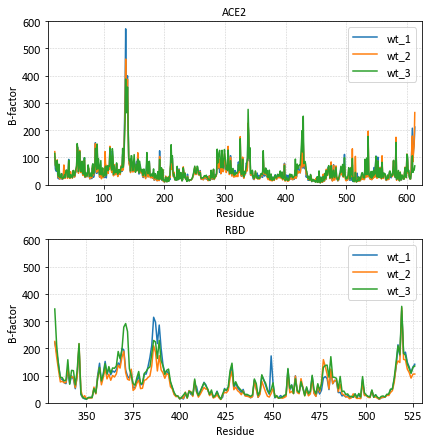

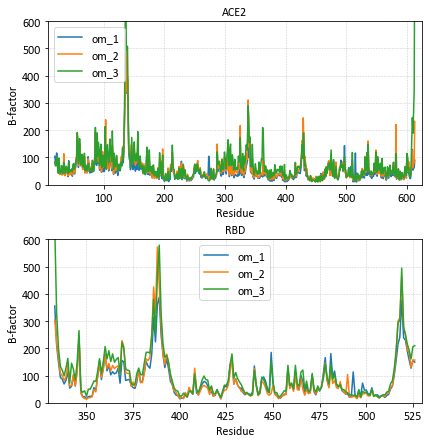

In [44]:
idx = [[0, 1, 2], [3, 4, 5]]
for m in range(2):
  with plt.style.context('matplotlibrc'):
    rcparams(plt, figsize, subplot)
    fig, ax = plt.subplots(2,1)
  for n in range(len(idx[m])):
    x,y = rmsf[idx[m][n]]
    x = [np.array(range(19,614)), np.array(range(333,527))]
    ax[0].plot(x[0], y[0:595], label = sys[idx[m][n]])
    ax[1].plot(x[1], y[596:790], label = sys[idx[m][n]])
    ax[0].set_title('ACE2')
    ax[1].set_title('RBD')
  for i in range(2):
    ax[i].set_xlabel('Residue')
    ax[i].set_ylabel(r'B-factor')
    ax[i].set_ylim(0, 600.0)
    ax[i].legend()

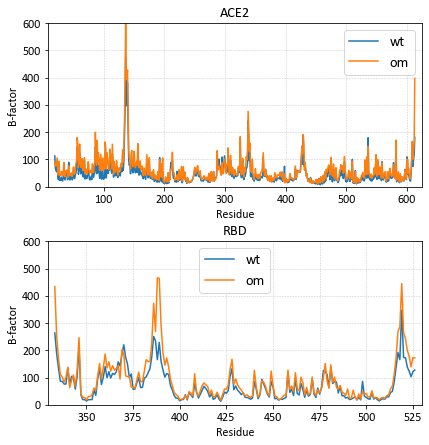

In [49]:
idx = [[0, 1, 2], [3, 4, 5]]
sys = ['wt', 'om']
with plt.style.context('matplotlibrc'):
  rcparams(plt, figsize, subplot)
  fig, ax = plt.subplots(2,1)
  for m in range(2):
    x,y = (rmsf[idx[m][0]] + rmsf[idx[m][1]] + rmsf[idx[m][2]]) / 3
    x = [np.array(range(19,614)), np.array(range(333,527))]
    ax[0].plot(x[0], y[0:595], label = sys[m])
    ax[1].plot(x[1], y[596:790], label = sys[m])
    ax[0].set_title('ACE2')
    ax[1].set_title('RBD')
  for i in range(2):
    ax[i].set_xlabel('Residue')
    ax[i].set_ylabel(r'B-factor')
    ax[i].set_ylim(0, 600.0)
    ax[i].legend()